PART 1

In this part NLTK was going to be used respectively spacy for the following analyses.

1. Perform sentence splitting and word tokenization. Report the statistics of word frequency (per story and in total) in a python dictionary, plot the 25 most common words (per story and in total) in the form of a histogram. 

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import os 
from collections import Counter 
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#function to open all the files, it reads the files, tokenizes words and counts sentences
def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file: #open read the file
        text = file.read()
#this tokenize, lower, and filters punctuation with word.isalnum() 
    words = [word.lower() for word in word_tokenize(text) if word.isalnum()] 
    return len(sent_tokenize(text)), words 

In [4]:
#Set the path to the directory containing all the 5 files
folder_path = "Part_I_1-2"

#Make a list of all the files
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

#Add default stopwords for more accurate results
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

default_stopwords = set(stopwords.words('english'))

#Add custom stopwords
custom_stopwords = {"the", "her", "said", "still", "got", "left", "sat", "another"}

#combine both stopwords
combined_stopwords = default_stopwords.union(custom_stopwords)


In [5]:
def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    # Tokenize sentences and words
    sentences = nltk.sent_tokenize(text)
    words = [word.lower() for word in word_tokenize(text) if word.isalnum()]
    
    # Filter out stopwords using the combined stopword list
    filtered_words = [word for word in words if word not in combined_stopwords]
    
    return len(sentences), filtered_words

In [6]:
#function to plot the bar chart with the 25 most common words in each file
def plot_top_words(word_freq, title): #composed by word frequencies and the file's title
    top_words = dict(word_freq.most_common(25)) #get the most frequent 25 words  
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values()) #create the plot
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') #for better readability
    plt.tight_layout() #adjust layout
    plt.show()



Statistics Story 1 (01.txt):
Number of sentences: 11
Number of words (without the stopwords): 140
Top 10 most frequent words:
{'river': 11, 'missy': 10, 'maps': 5, 'sitting': 3, 'chair': 3, 'placing': 3, 'house': 2, 'map': 2, 'people': 2, 'looked': 2}


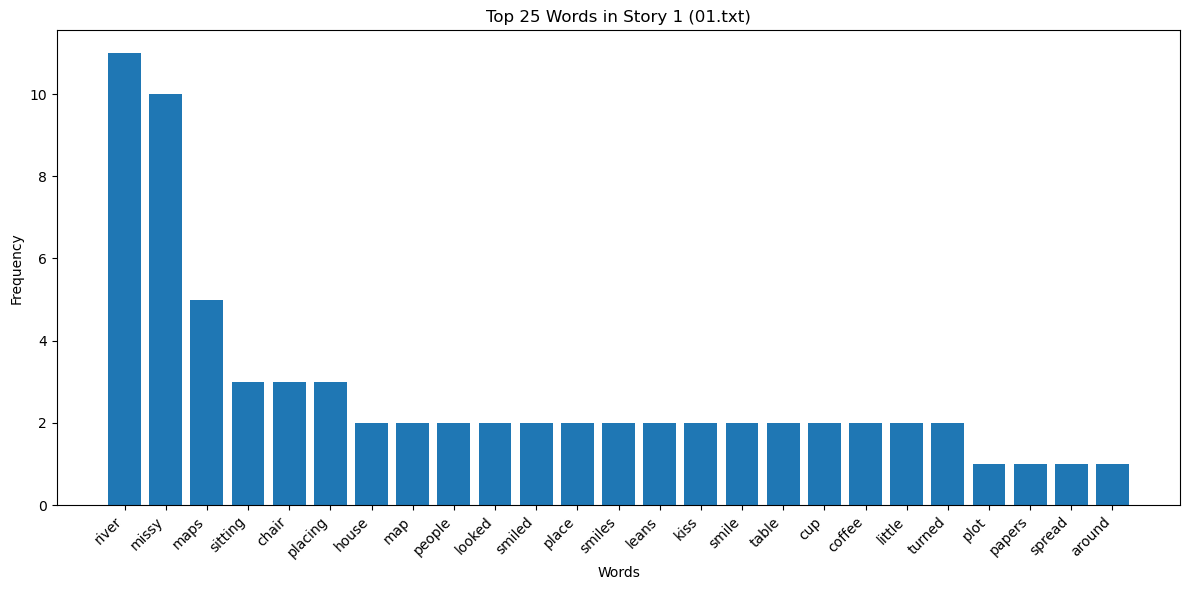


Statistics Story 2 (02.txt):
Number of sentences: 20
Number of words (without the stopwords): 251
Top 10 most frequent words:
{'back': 6, 'wanted': 5, 'come': 4, 'smiled': 4, 'looked': 3, 'eyes': 3, 'look': 3, 'loved': 3, 'day': 3, 'used': 3}


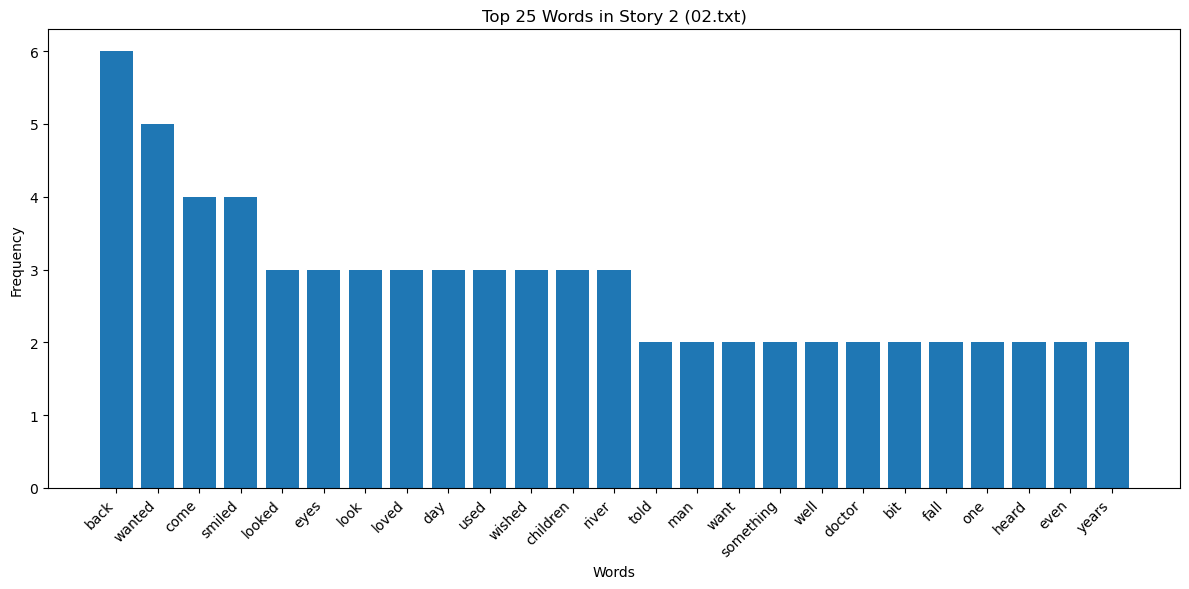


Statistics Story 3 (03.txt):
Number of sentences: 182
Number of words (without the stopwords): 874
Top 10 most frequent words:
{'rose': 25, 'doctor': 20, 'time': 15, 'one': 10, 'would': 10, 'energy': 8, 'vortex': 8, 'long': 8, 'hand': 8, 'much': 8}


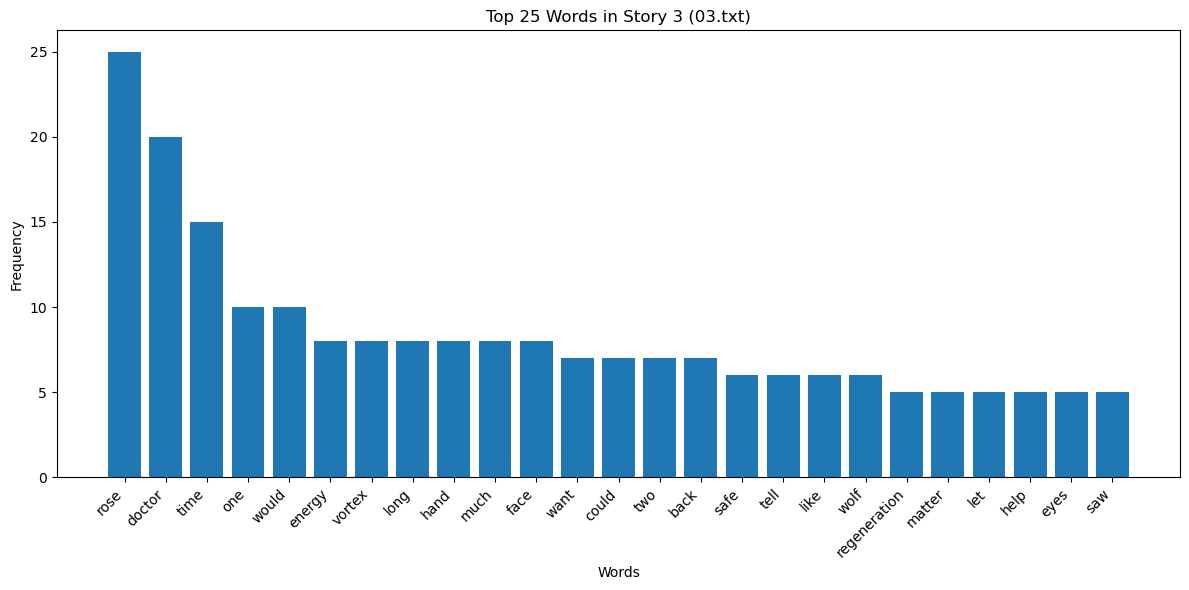


Statistics Story 4 (04.txt):
Number of sentences: 90
Number of words (without the stopwords): 511
Top 10 most frequent words:
{'doctor': 30, 'rose': 21, 'martha': 20, 'tardis': 9, 'could': 8, 'life': 6, 'time': 5, 'like': 5, 'translate': 5, 'way': 4}


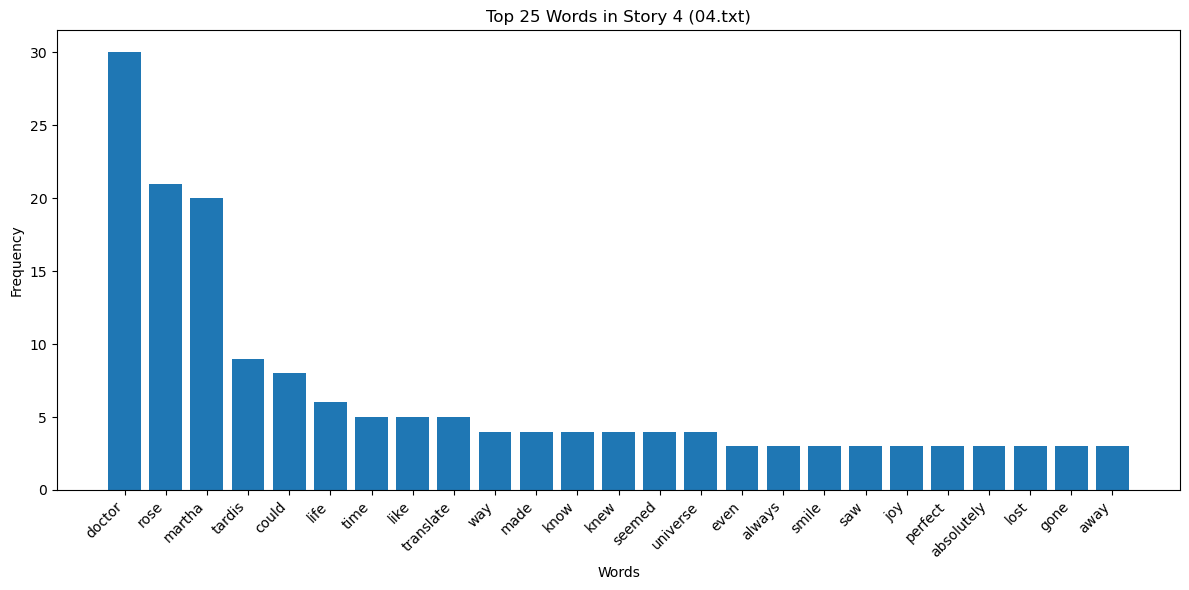


Statistics Story 5 (05.txt):
Number of sentences: 224
Number of words (without the stopwords): 1685
Top 10 most frequent words:
{'doctor': 31, 'eyes': 15, 'could': 13, 'back': 13, 'yet': 12, 'like': 12, 'time': 12, 'would': 11, 'face': 10, 'shot': 10}


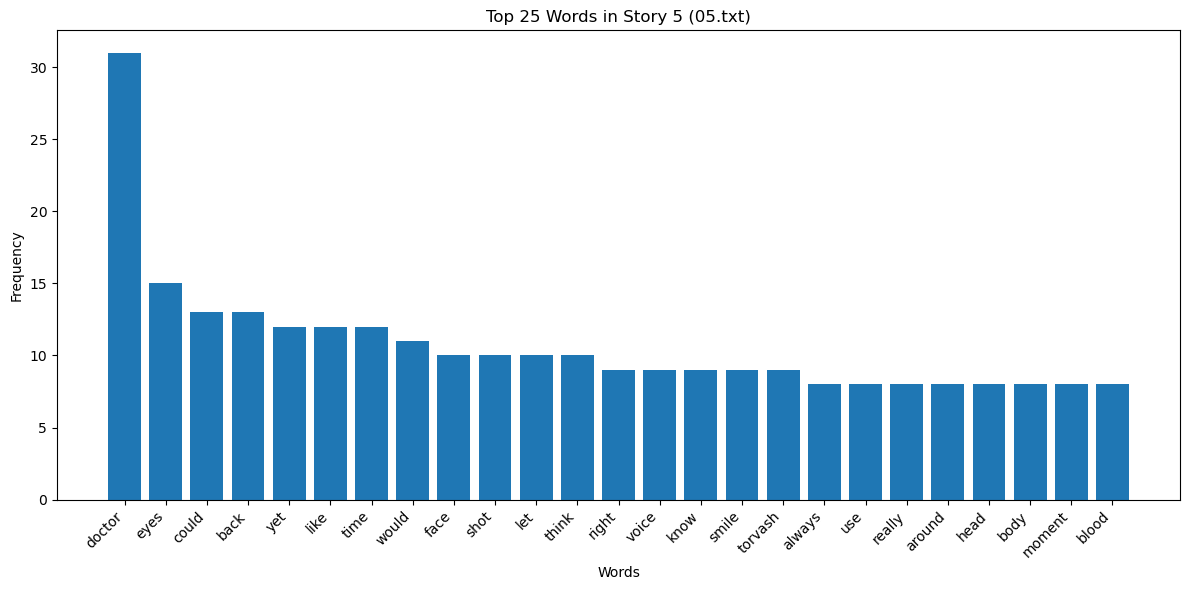

In [7]:
# Initialize a list to store all words across all files
total_words = []

# Process each file
for each, file in enumerate(files, 1):
    file_path = os.path.join(folder_path, file)
    
    # Process file and get sentence count and filtered word list
    sentence_count, words = process_file(file_path)
    
    # Count word frequency after filtering out stopwords
    word_freq = Counter(words)
    
    # Print statistics for each file
    print(f"\nStatistics Story {each} ({file}):")
    print(f"Number of sentences: {sentence_count}")
    print(f"Number of words (without the stopwords): {len(words)}")
    print("Top 10 most frequent words:")
    print(dict(word_freq.most_common(10)))
    
    # Plot top 25 most common words in each file
    plot_top_words(word_freq, f"Top 25 Words in Story {each} ({file})")
    
    # Add filtered words from each file to total_word list
    total_words.extend(words)

Total Statistics:
Total number of words (without the stopwords): 3461
Top 10 most frequent words in all the files:
{'doctor': 83, 'rose': 46, 'time': 32, 'could': 29, 'back': 27, 'like': 25, 'eyes': 24, 'would': 23, 'martha': 20, 'face': 19}


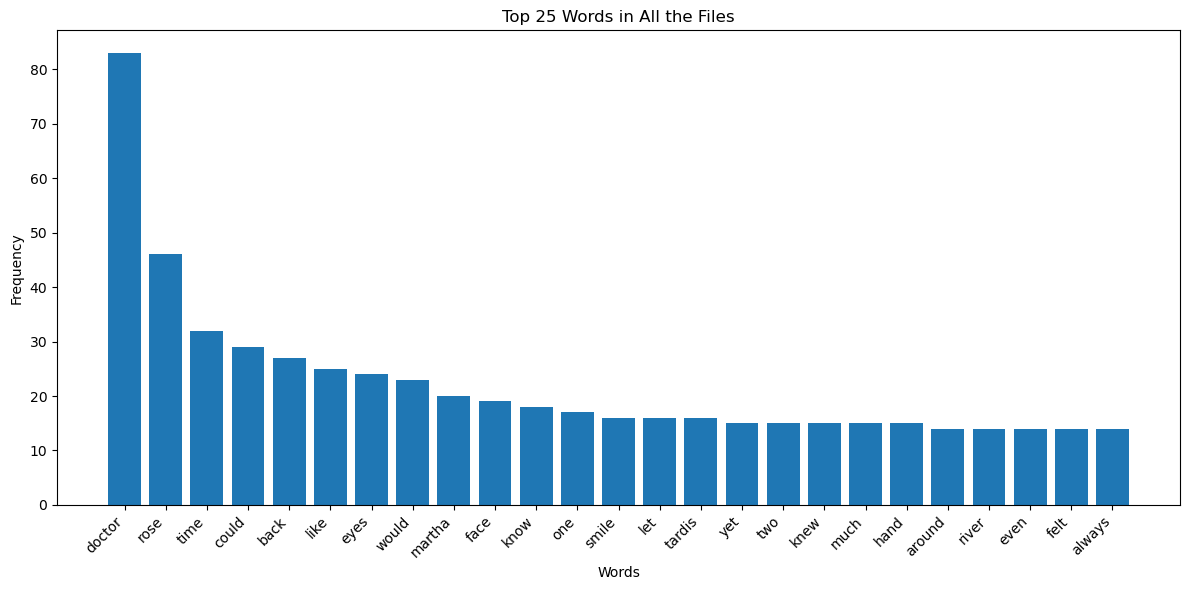

In [8]:
# This is for the overall word frequency across all files
total_word_freq = Counter(total_words)

# Overall statistics
print("Total Statistics:")
print(f"Total number of words (without the stopwords): {len(total_words)}")
print("Top 10 most frequent words in all the files:")
print(dict(total_word_freq.most_common(10)))

# Plot top 25 most common words across all files combined
plot_top_words(total_word_freq, "Top 25 Words in All the Files")


2. Perform stemming on the text using the Porter and Lancaster stemmer. Re-create the statistics and the plot from 1.

In [9]:
#Make a function to process the files without stemming.
def process_file_unstemmed(file_path, combined_stopwords):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    #Tokenize, lower case, remove punctuation, add stopwords
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in combined_stopwords]
    return words

In [10]:
#Function to process files with stemming
def process_file_stemmed(file_path, stemmer, combined_stopwords): #function to process the file, with stemmer including the stopwords
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    #Tokenize, lowercase, remove punctuation, add stopwords
    words = [stemmer.stem(word.lower()) for word in word_tokenize(text) if word.isalnum() and word.lower() not in combined_stopwords]
    return words

In [11]:
#Making the plot of the 25 most common words
def plot_top_words(word_freq, title):
    top_words = dict(word_freq.most_common(25)) #getting 25 most common words and freq
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values()) #creating plot
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') #for readability
    plt.tight_layout()
    plt.show()

In [12]:
#Path of the files
folder_path = "Part_I_1-2"
#Get a list of all files in the directory
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


Statistics for Story 1 (01.txt) - Unstemmed:
Number of words (excluding stopwords): 140
Top 10 most frequent words:
{'river': 11, 'missy': 10, 'maps': 5, 'sitting': 3, 'chair': 3, 'placing': 3, 'house': 2, 'map': 2, 'people': 2, 'looked': 2}


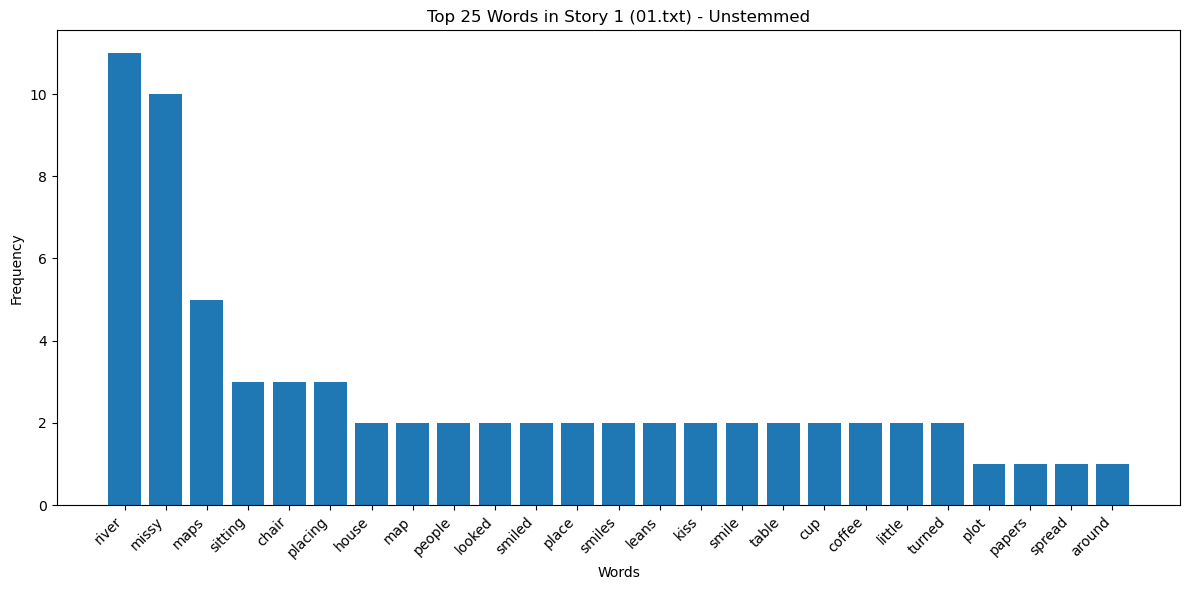


Statistics for Story 2 (02.txt) - Unstemmed:
Number of words (excluding stopwords): 251
Top 10 most frequent words:
{'back': 6, 'wanted': 5, 'come': 4, 'smiled': 4, 'looked': 3, 'eyes': 3, 'look': 3, 'loved': 3, 'day': 3, 'used': 3}


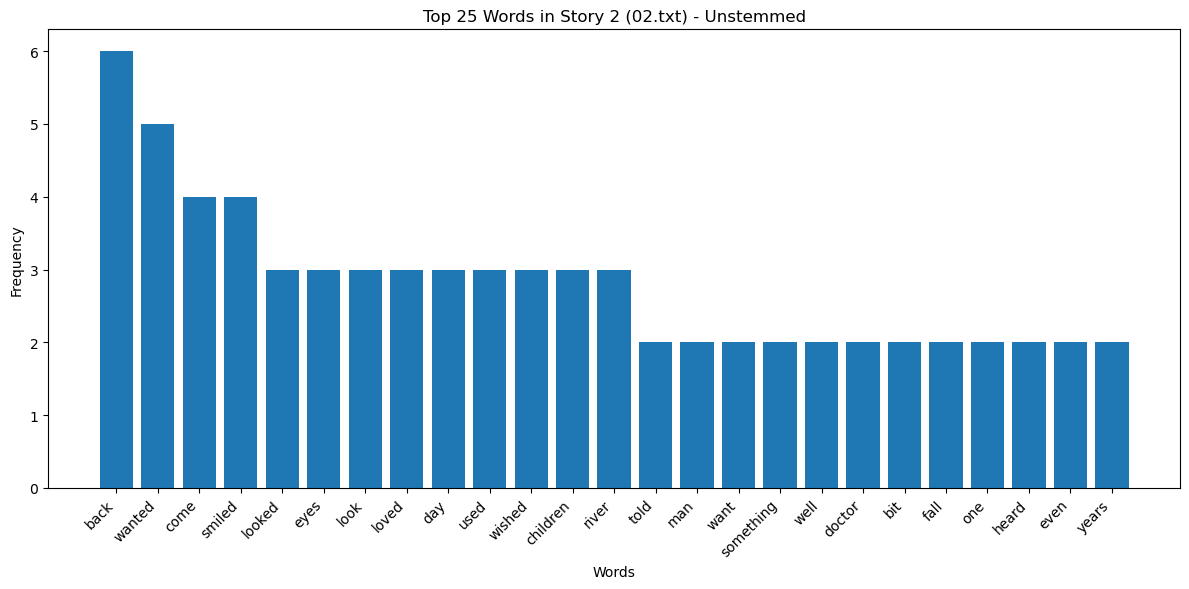


Statistics for Story 3 (03.txt) - Unstemmed:
Number of words (excluding stopwords): 874
Top 10 most frequent words:
{'rose': 25, 'doctor': 20, 'time': 15, 'one': 10, 'would': 10, 'energy': 8, 'vortex': 8, 'long': 8, 'hand': 8, 'much': 8}


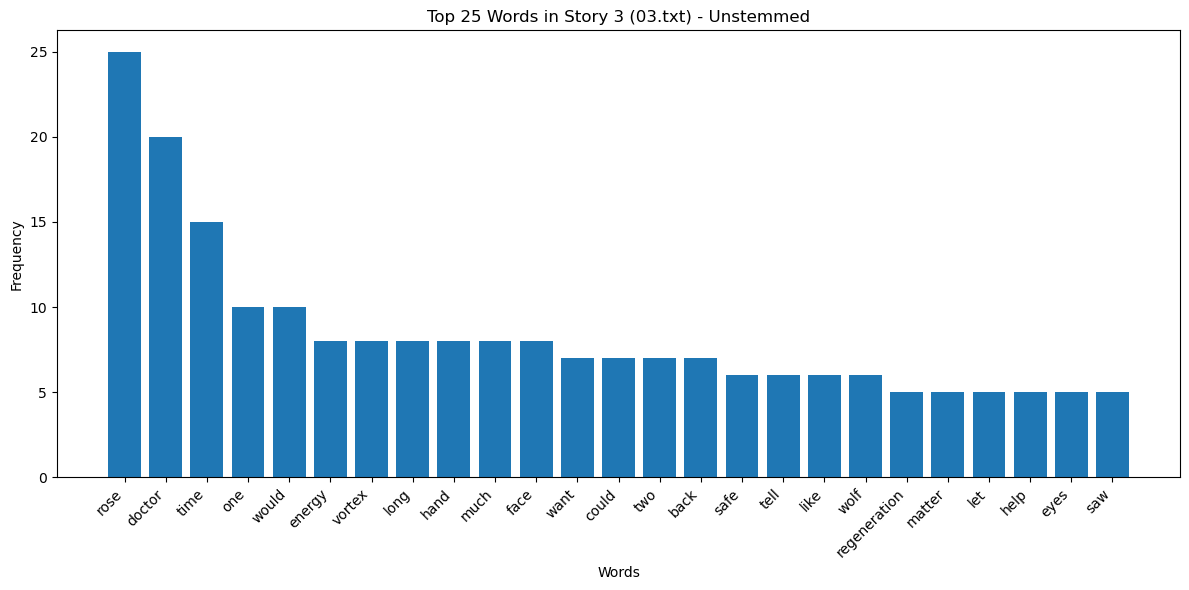


Statistics for Story 4 (04.txt) - Unstemmed:
Number of words (excluding stopwords): 511
Top 10 most frequent words:
{'doctor': 30, 'rose': 21, 'martha': 20, 'tardis': 9, 'could': 8, 'life': 6, 'time': 5, 'like': 5, 'translate': 5, 'way': 4}


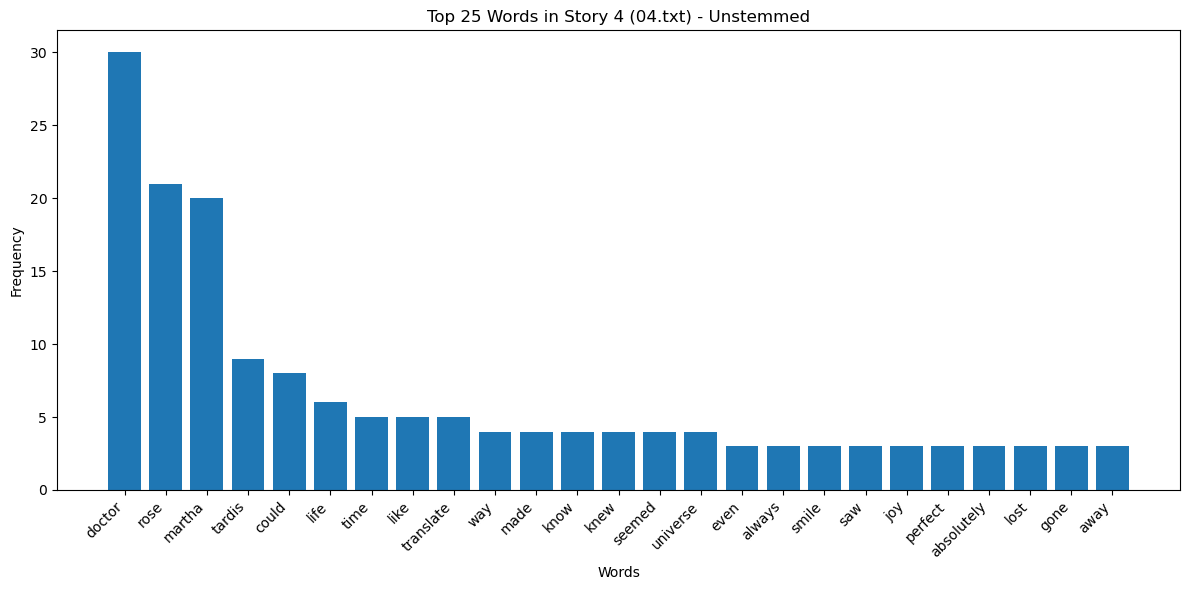


Statistics for Story 5 (05.txt) - Unstemmed:
Number of words (excluding stopwords): 1685
Top 10 most frequent words:
{'doctor': 31, 'eyes': 15, 'could': 13, 'back': 13, 'yet': 12, 'like': 12, 'time': 12, 'would': 11, 'face': 10, 'shot': 10}


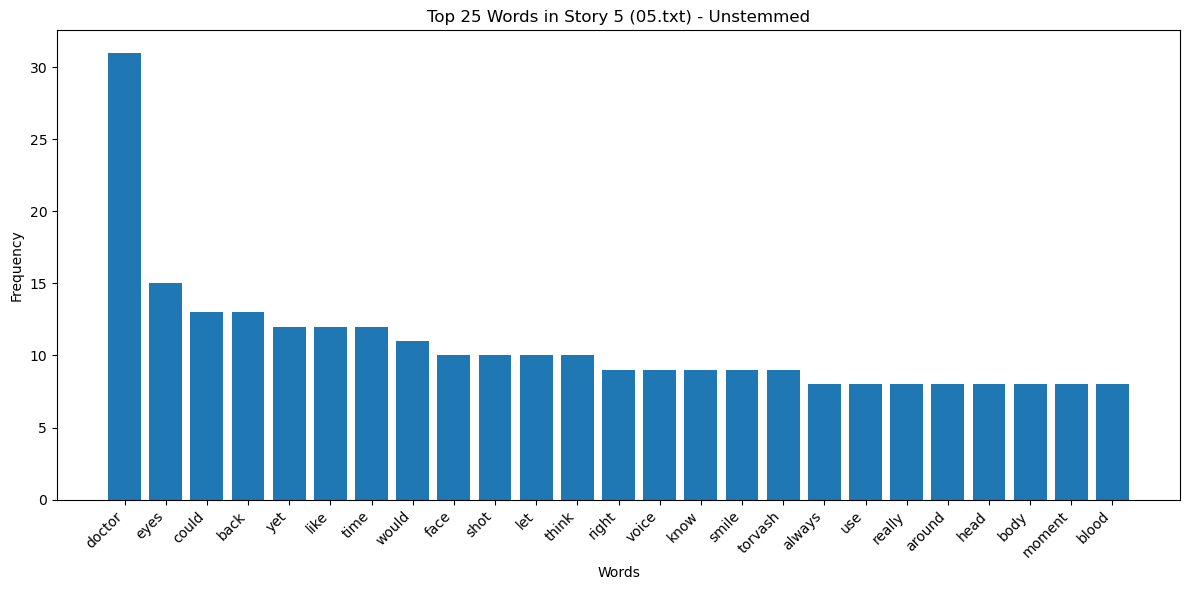


Statistics for Story 1 (01.txt) - Porter Stemmed:
Number of words (excluding stopwords): 140
Top 10 most frequent words:
{'river': 11, 'missi': 10, 'map': 7, 'smile': 6, 'look': 5, 'place': 5, 'sit': 3, 'chair': 3, 'cup': 3, 'hous': 2}


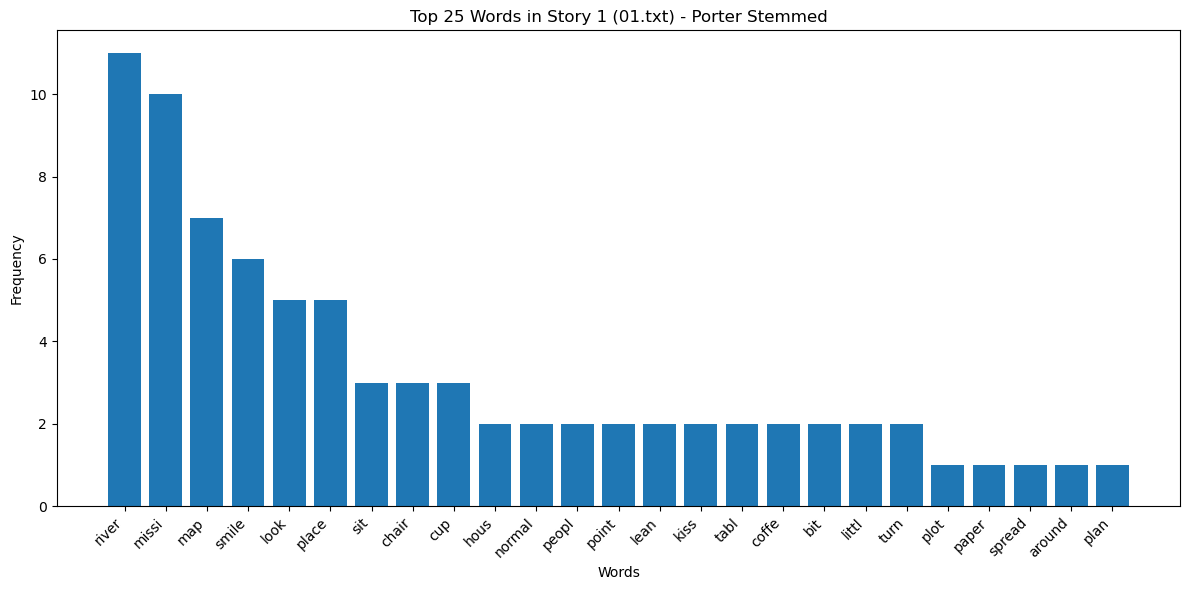


Statistics for Story 2 (02.txt) - Porter Stemmed:
Number of words (excluding stopwords): 251
Top 10 most frequent words:
{'want': 7, 'look': 6, 'back': 6, 'come': 5, 'smile': 5, 'love': 4, 'eye': 3, 'know': 3, 'day': 3, 'use': 3}


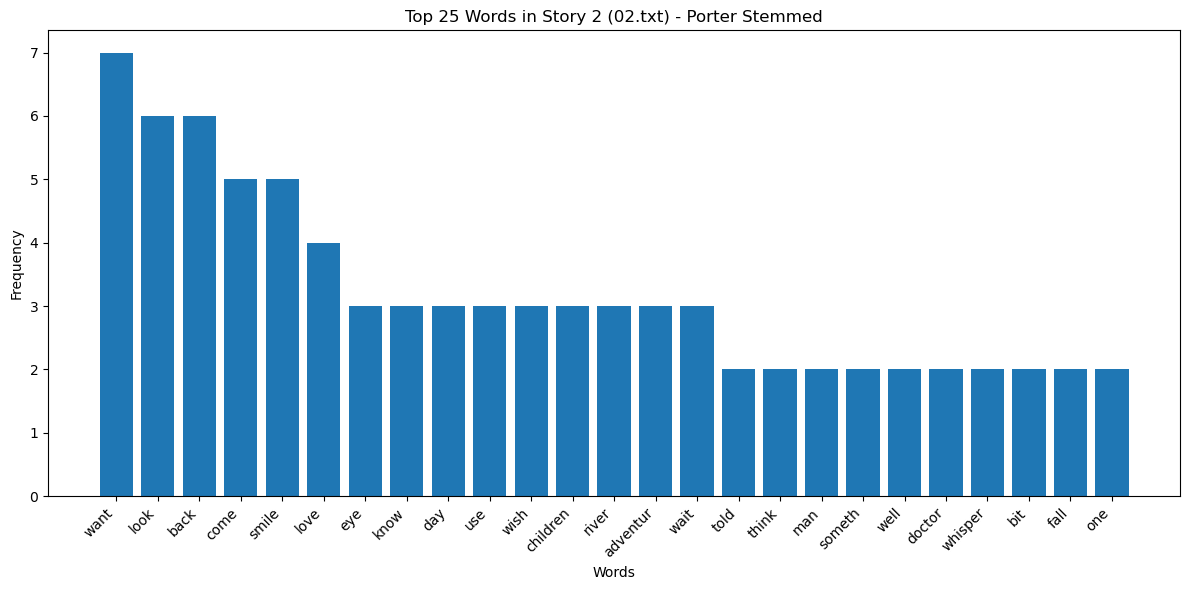


Statistics for Story 3 (03.txt) - Porter Stemmed:
Number of words (excluding stopwords): 874
Top 10 most frequent words:
{'rose': 25, 'doctor': 20, 'time': 16, 'want': 12, 'face': 11, 'one': 10, 'would': 10, 'hand': 10, 'long': 9, 'regener': 8}


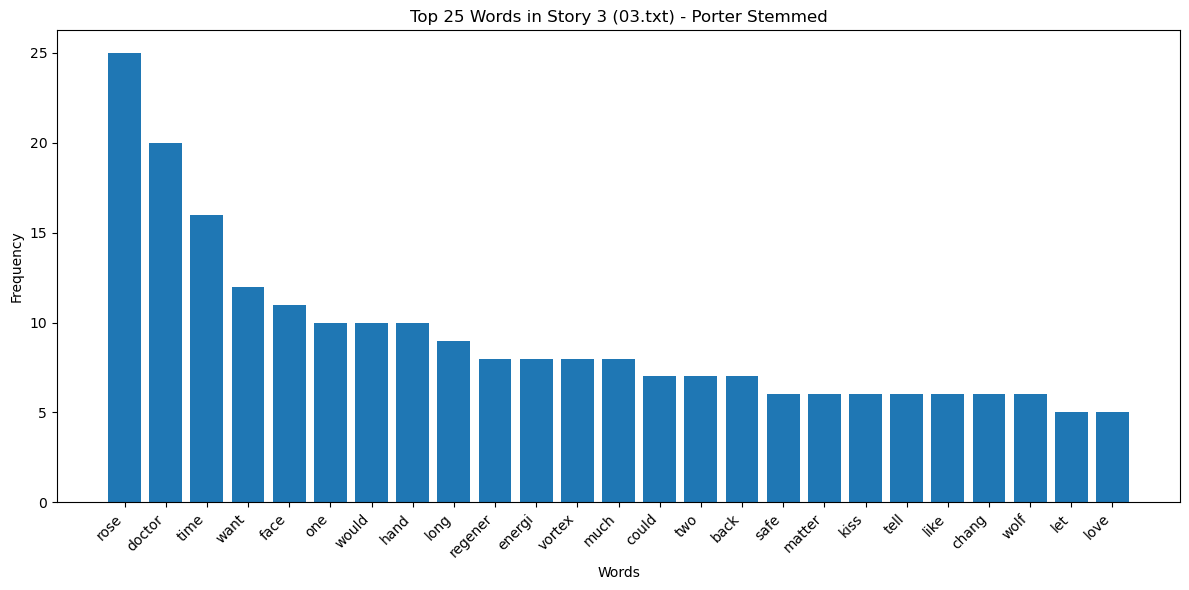


Statistics for Story 4 (04.txt) - Porter Stemmed:
Number of words (excluding stopwords): 511
Top 10 most frequent words:
{'doctor': 30, 'rose': 22, 'martha': 20, 'tardi': 9, 'could': 8, 'life': 6, 'translat': 6, 'smile': 5, 'time': 5, 'like': 5}


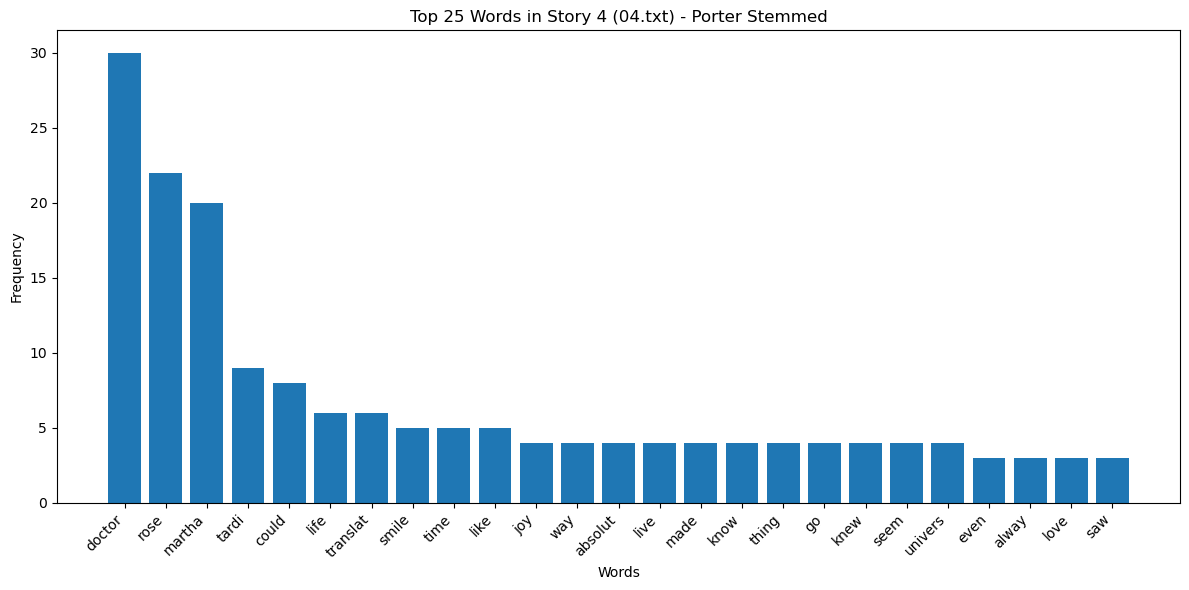


Statistics for Story 5 (05.txt) - Porter Stemmed:
Number of words (excluding stopwords): 1685
Top 10 most frequent words:
{'doctor': 31, 'eye': 19, 'time': 15, 'could': 13, 'like': 13, 'hand': 13, 'back': 13, 'yet': 12, 'would': 11, 'way': 10}


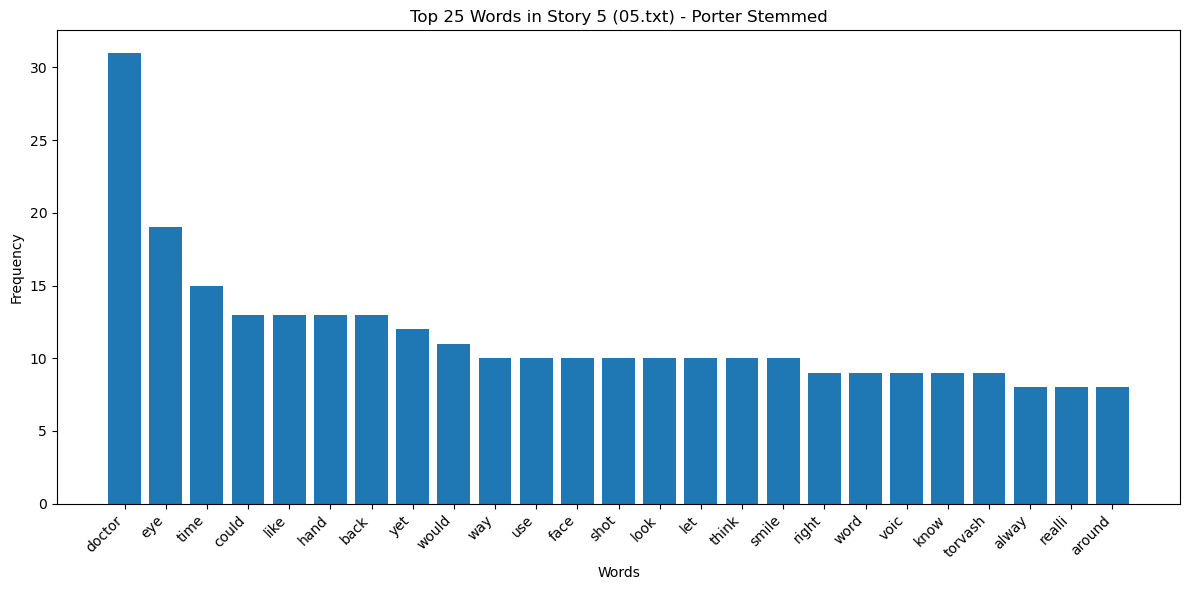


Statistics for Story 1 (01.txt) - Lancaster Stemmed:
Number of words (excluding stopwords): 140
Top 10 most frequent words:
{'riv': 11, 'missy': 10, 'map': 7, 'smil': 6, 'look': 5, 'plac': 5, 'sit': 3, 'chair': 3, 'cup': 3, 'hous': 2}


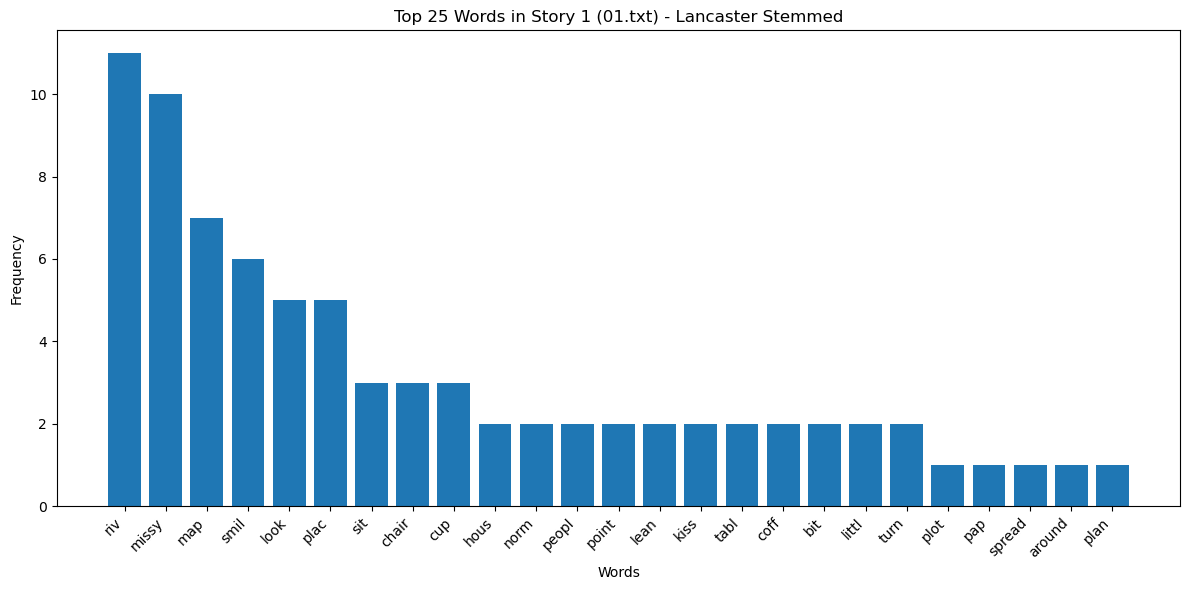


Statistics for Story 2 (02.txt) - Lancaster Stemmed:
Number of words (excluding stopwords): 251
Top 10 most frequent words:
{'want': 7, 'look': 6, 'back': 6, 'com': 5, 'smil': 5, 'lov': 4, 'ey': 3, 'know': 3, 'day': 3, 'ev': 3}


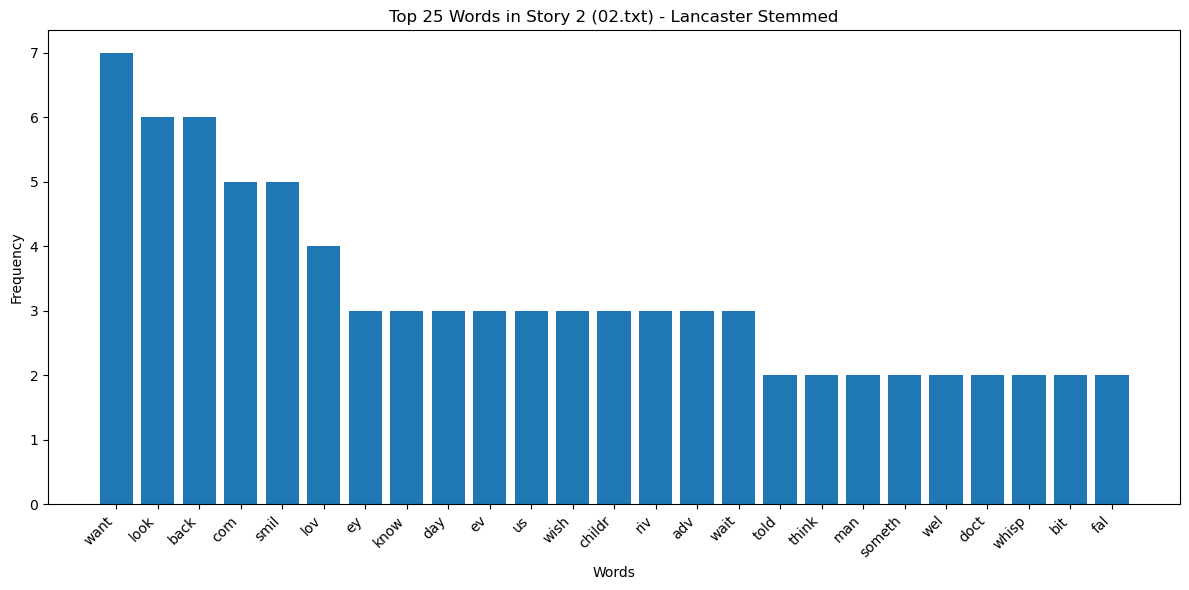


Statistics for Story 3 (03.txt) - Lancaster Stemmed:
Number of words (excluding stopwords): 874
Top 10 most frequent words:
{'ros': 25, 'doct': 20, 'tim': 16, 'want': 12, 'long': 11, 'fac': 11, 'on': 10, 'would': 10, 'hand': 10, 'reg': 9}


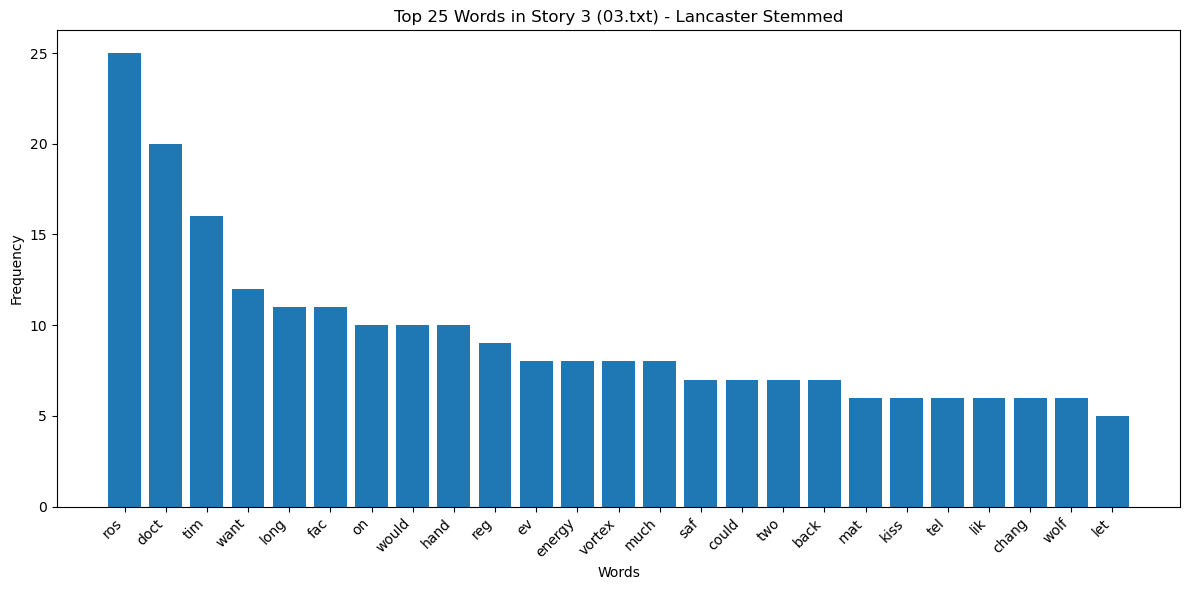


Statistics for Story 4 (04.txt) - Lancaster Stemmed:
Number of words (excluding stopwords): 511
Top 10 most frequent words:
{'doct': 30, 'ros': 22, 'marth': 20, 'tard': 9, 'could': 8, 'lif': 6, 'transl': 6, 'smil': 5, 'tim': 5, 'lik': 5}


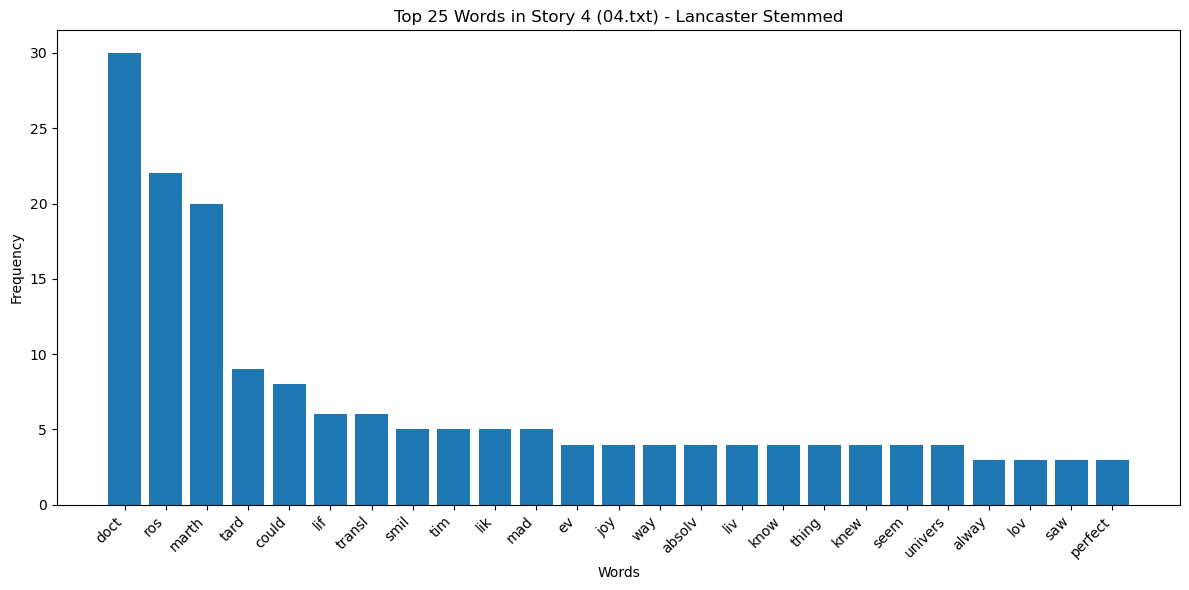


Statistics for Story 5 (05.txt) - Lancaster Stemmed:
Number of words (excluding stopwords): 1685
Top 10 most frequent words:
{'doct': 31, 'ey': 19, 'tim': 15, 'could': 13, 'lik': 13, 'us': 13, 'hand': 13, 'back': 13, 'yet': 12, 'real': 12}


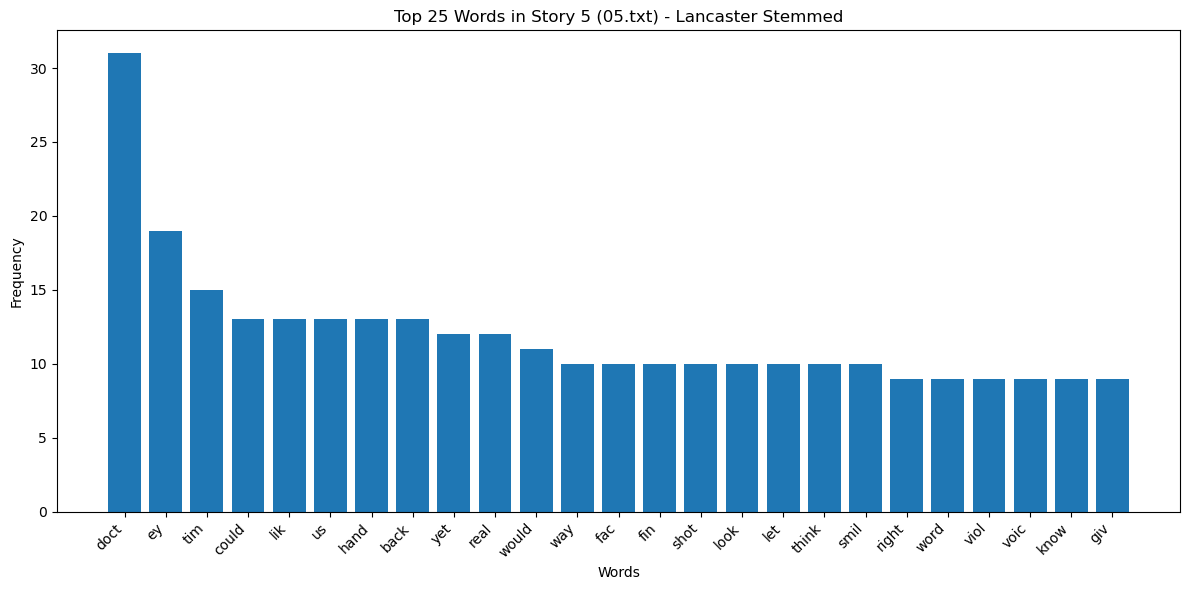

In [13]:
# Initialize stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

# Process files for unstemmed, Porter-stemmed, and Lancaster-stemmed versions
for mode, stemmer in [("Unstemmed", None), ("Porter Stemmed", porter_stemmer), ("Lancaster Stemmed", lancaster_stemmer)]:
    total_words = []
    # Process each file
    for each, file in enumerate(files, 1):
        file_path = os.path.join(folder_path, file)
        # Choose processing function based on mode (unstemmed or stemmed)
        if mode == "Unstemmed":
            words = process_file_unstemmed(file_path, combined_stopwords)
        else:
            words = process_file_stemmed(file_path, stemmer, combined_stopwords)
        # Count word frequencies
        word_freq = Counter(words)
        
        # Statistics for each of the files
        print(f"\nStatistics for Story {each} ({file}) - {mode}:")
        print(f"Number of words (excluding stopwords): {len(words)}")
        print("Top 10 most frequent words:")
        print(dict(word_freq.most_common(10)))
        
        # Plot top 25 most common words for each file
        plot_top_words(word_freq, f"Top 25 Words in Story {each} ({file}) - {mode}")
        
        # Add filtered words to total list across all files
        total_words.extend(words)


Total Statistics - Unstemmed:
Total number of words (removing stopwords): 3461
Unique words: 1477
Top 10 most frequent words overall:
{'doctor': 83, 'rose': 46, 'time': 32, 'could': 29, 'back': 27, 'like': 25, 'eyes': 24, 'would': 23, 'martha': 20, 'face': 19}


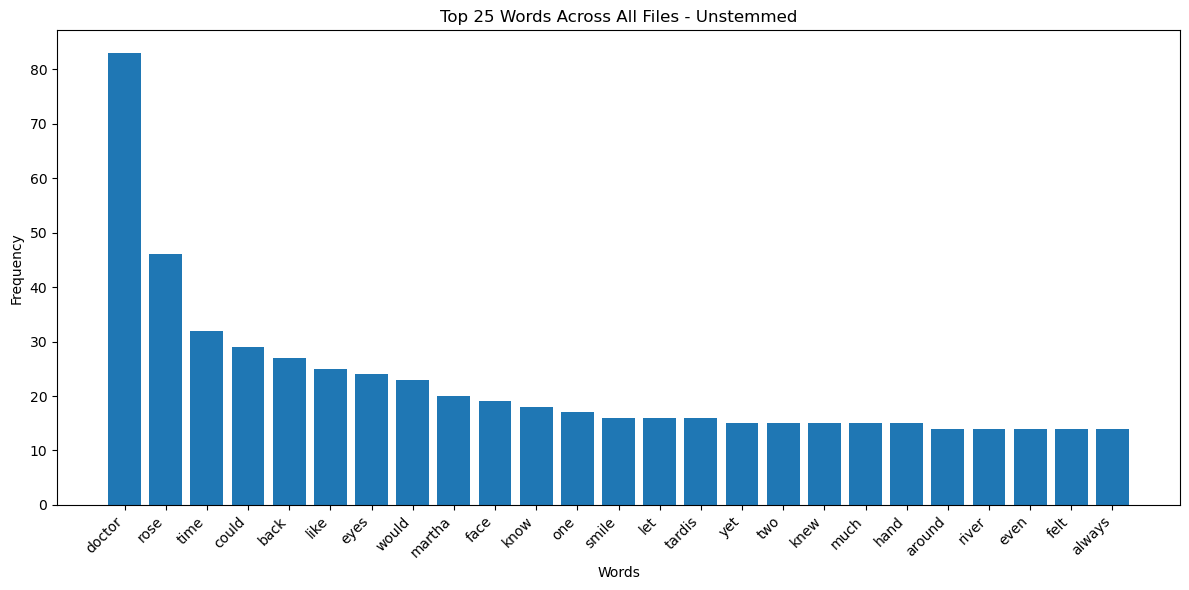


Total Statistics - Porter Stemmed:
Total number of words (removing stopwords): 3461
Unique words: 1195
Top 10 most frequent words overall:
{'doctor': 83, 'rose': 47, 'time': 36, 'could': 29, 'smile': 28, 'back': 28, 'eye': 28, 'like': 26, 'look': 25, 'hand': 25}


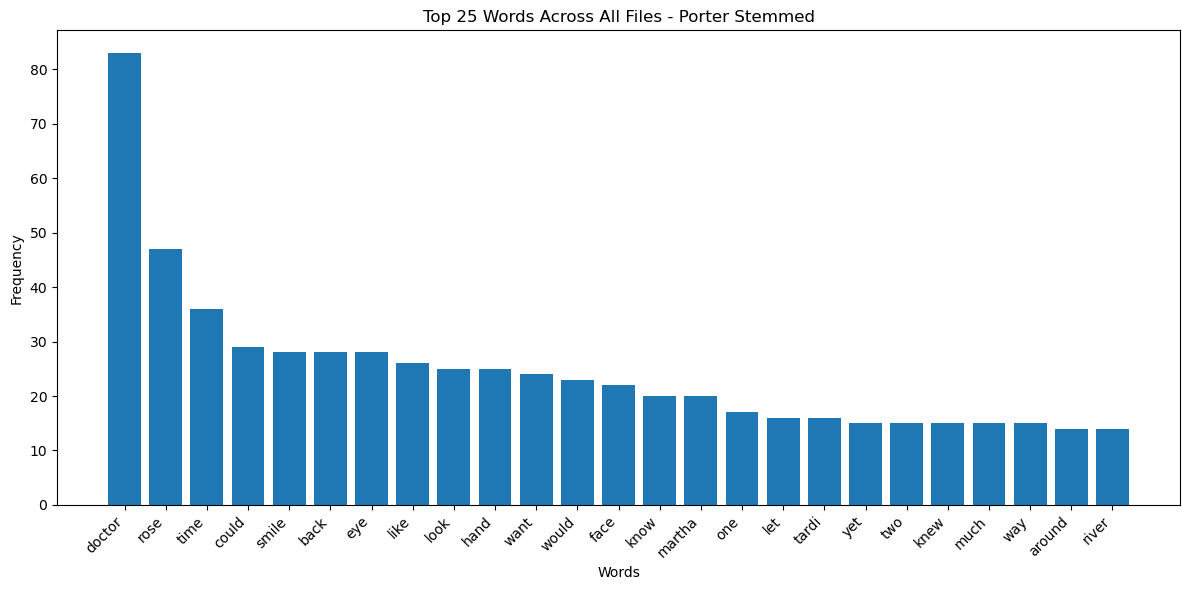


Total Statistics - Lancaster Stemmed:
Total number of words (removing stopwords): 3461
Unique words: 1121
Top 10 most frequent words overall:
{'doct': 83, 'ros': 47, 'tim': 36, 'could': 29, 'smil': 28, 'back': 28, 'ey': 28, 'lik': 26, 'look': 25, 'hand': 25}


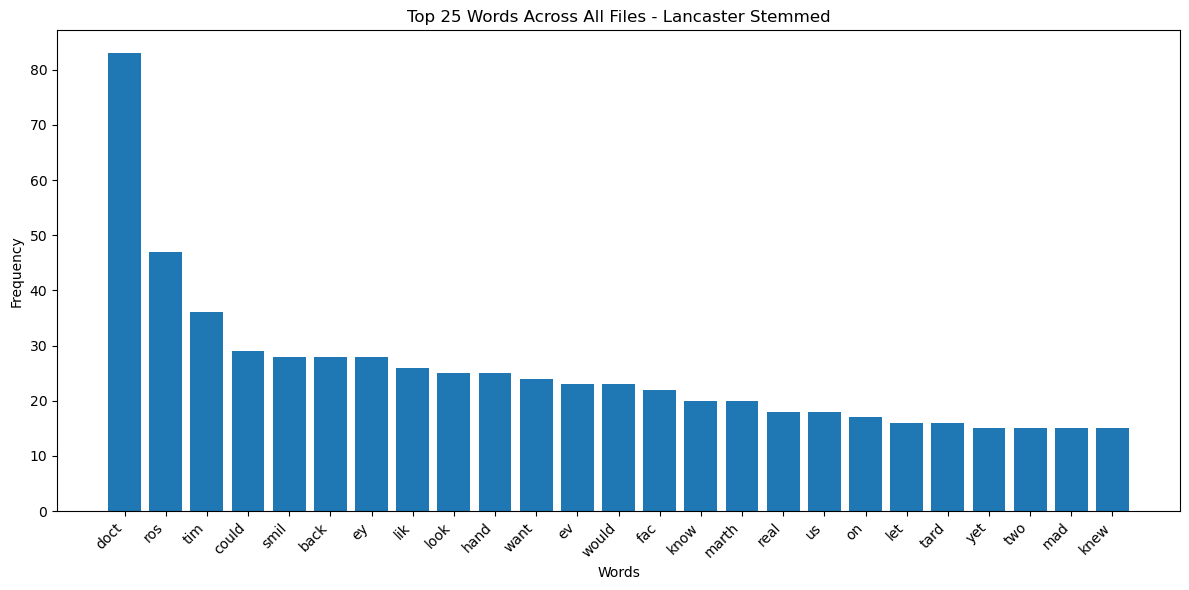

In [14]:
#This part of the code is to print all the total statistics for each mode (Unstemmed, Lancaster and Porter)
mode_statistics = {}

# Process files for unstemmed, Porter-stemmed, and Lancaster-stemmed versions
for mode, stemmer in [("Unstemmed", None), ("Porter Stemmed", porter_stemmer), ("Lancaster Stemmed", lancaster_stemmer)]:
    total_words = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        if mode == "Unstemmed":
            words = process_file_unstemmed(file_path, combined_stopwords)
        else:
            words = process_file_stemmed(file_path, stemmer, combined_stopwords)
        
        # Add filtered words to the total list across all files
        total_words.extend(words)
        
    # Overall word frequency of all files for this each mode
    total_word_freq = Counter(total_words)
    
    # Store statistics in a dic
    mode_statistics[mode] = {
        "total_words": len(total_words),
        "unique_words": len(total_word_freq),
        "top_10_words": dict(total_word_freq.most_common(10)),
        "word_freq": total_word_freq  
    }

# Print overall statistics for each mode
for mode, stats in mode_statistics.items():
    print(f"\nTotal Statistics - {mode}:")
    print(f"Total number of words (removing stopwords): {stats['total_words']}")
    print(f"Unique words: {stats['unique_words']}")
    print("Top 10 most frequent words overall:")
    print(stats['top_10_words'])
    
    # Plot top 25 most common words across all files combined for this mode
    plot_top_words(stats['word_freq'], f"Top 25 Words Across All Files - {mode}")


3. In Brightspace, you will find three translations of Tom Sawyer by Mark Twain. After cleaning the document (e.g. removing the preamble, TOC, licensing information …), use the appropriate spacy models to derive the POS-tags of the text. Report the frequencies of the tags for the three languages. What assumptions do you make based on the findings?

In [15]:
import spacy
import os
from collections import Counter

def process_file(file_path, nlp):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    doc = nlp(text)
    return [token.pos_ for token in doc]

def count_pos_tags(tags):
    return Counter(tags)

folder_path = "Part_I_3"
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

#Uploading the language models
nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")

for file in files:
    file_path = os.path.join(folder_path, file)
    lang_code = file.split('_')[0]
    
    if lang_code == 'en':
        nlp = nlp_en
    elif lang_code == 'nl':
        nlp = nlp_fr
    elif lang_code == 'de':
        nlp = nlp_de

    pos_tags = process_file(file_path, nlp)
    tag_frequencies = count_pos_tags(pos_tags)
    
    print(f"\nPOS tag frequencies for {file}:")
    for tag, freq in tag_frequencies.most_common():
        print(f"{tag}: {freq}")



POS tag frequencies for de_pg30165.txt:
PUNCT: 18730
NOUN: 11299
VERB: 9565
ADV: 9343
PRON: 8795
DET: 7486
SPACE: 6966
ADP: 5353
PROPN: 3920
AUX: 3760
CCONJ: 3367
ADJ: 2983
PART: 1683
SCONJ: 1518
X: 1170
NUM: 333
INTJ: 209

POS tag frequencies for en_pg74.txt:
PUNCT: 15821
NOUN: 12927
VERB: 11752
PRON: 10457
ADP: 7768
DET: 7343
SPACE: 6939
ADV: 4953
ADJ: 4639
AUX: 4523
CCONJ: 4011
PROPN: 3943
PART: 2193
SCONJ: 1873
NUM: 695
INTJ: 477
X: 80
SYM: 7

POS tag frequencies for nl_pg18381.txt:
PUNCT: 14247
NOUN: 12381
VERB: 11865
PRON: 10034
ADP: 8872
SPACE: 7536
DET: 7140
ADV: 5776
ADJ: 5166
PROPN: 4320
AUX: 3863
CCONJ: 3616
SCONJ: 2001
SYM: 1690
NUM: 435
INTJ: 367
X: 34


PART 2

On the data for Part I (1+2), perform Named Entity Recognition using spacy. Annotate a small data set of 1-2 sentences per text with named entity categories. (The sentences are supposed to include names of characters, places and other entities.)

Two random sentences were chosen from each file.
These sentences are being manually annotated:

- sentence_1_1 = "Missy[PERSON] was sitting on a chair[OBJECT] in a house[LOCATION], maps[OBJECT] and papers[OBJECT] spread around, normally her planning was mental, but River[PERSON] had suggested a physical map[OBJECT] to refer to and it was helpful"
- sentence_2_1 = " River[PERSON] walked out of the bedroom[LOCATION]"

- sentence_1_2 = "Fall in love with who you'll one day[DATE] be, but please, don't fall so hard"
- sentence_2_2 = "River[PERSON] hadn’t gotten lots of sleep since he visited"

- sentence_1_3 = "The Doctor[PERSON] shook his head"
- sentence_2_3 = "Rose[PERSON] blinked back at him, confused"

- sentence_1_4 = "Rose[PERSON] brought a new joy into The Doctor’s[PERSON] life that he never thought he would feel again"
- sentence_2_4 = "Then he met Rose[PERSON], her presence made life worth living again"

- sentence_1_5 = "Days[DATE] turned into weeks[DATE]"
- sentence_2_5 = "The Doctor[PERSON] was clever, incredibly so, and yet she failed to see your truest intentions"

In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")

sentences = [
    "Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful",
    "River walked out of the bedroom",
    "Fall in love with who you'll one day be, but please, don't fall so hard",
    "River hadn't gotten lots of sleep since he visited",
    "The Doctor shook his head",
    "Rose blinked back at him, confused",
    "Rose brought a new joy into The Doctor’s life that he never thought he would feel again",
    "Then he met Rose, her presence made life worth living again",
    "Days turned into weeks",
    "The Doctor was clever, incredibly so, and yet she failed to see your truest intentions."
]

for sentence in sentences:
    doc = nlp(sentence)
    print(f"Sentence: {sentence}")
    print("Entities:")
    for ent in doc.ents:
        print(f"  - {ent.text} ({ent.label_})")
    print()


Sentence: Missy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful
Entities:
  - Missy (PERSON)
  - River (LOC)

Sentence: River walked out of the bedroom
Entities:

Sentence: Fall in love with who you'll one day be, but please, don't fall so hard
Entities:
  - one day (DATE)

Sentence: River hadn't gotten lots of sleep since he visited
Entities:

Sentence: The Doctor shook his head
Entities:

Sentence: Rose blinked back at him, confused
Entities:

Sentence: Rose brought a new joy into The Doctor’s life that he never thought he would feel again
Entities:

Sentence: Then he met Rose, her presence made life worth living again
Entities:
  - Rose (PERSON)

Sentence: Days turned into weeks
Entities:
  - weeks (DATE)

Sentence: The Doctor was clever, incredibly so, and yet she failed to see your truest intentions.
Entities:



How good or bad is the performance of the automatic method on the manually annotated text? Report Precision, Recall, F1 Score. Using Scikit-learn and the function classification_report

In [18]:
#if nothing just put blank ''
from sklearn.metrics import classification_report
y_true = ['PERSON', 'OBJECT', 'LOCATION', 'OBJECT', 'OBJECT', 'PERSON', 'OBJECT', 'PERSON', 'LOCATION', 'DATE', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DATE', 'DATE', 'PERSON' ]
y_predicted = ['PERSON', '', '', '', '', 'LOCATION', '', '', '', 'DATE', '', '', '', '', '', 'PERSON', '', 'DATE', '']
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
        DATE       1.00      0.67      0.80         3
    LOCATION       0.00      0.00      0.00         2
      OBJECT       0.00      0.00      0.00         4
      PERSON       1.00      0.20      0.33        10

    accuracy                           0.21        19
   macro avg       0.40      0.17      0.23        19
weighted avg       0.68      0.21      0.30        19



C:\Users\Olga\anaconda4\envs\AsigmentLab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olga\anaconda4\envs\AsigmentLab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olga\anaconda4\envs\AsigmentLab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
